# Predictive Analysis of Online Content Engagement
Introduction

This project explores predictive modeling by analyzing a dataset from Mashable to predict the popularity of online articles based on diverse features. The process encompasses systematic data analysis, preparation, feature selection, and linear regression modeling to discern the factors influencing article shares on the web.

1. Data Loading and Preliminary Analysis

The initial phase involves loading the dataset from a GitHub repository, using Python libraries such as Pandas to import the data and inspecting the first few rows to understand the types of variables involved.

2. Exploratory Data Analysis (EDA)

In the exploratory data analysis, the focus is on understanding the data structure, identifying anomalies, and analyzing the distribution of key variables like article shares. Summary statistics are reviewed, and visual tools such as histograms and correlation matrices are employed to explore relationships between features.

3. Data Preprocessing and Feature Selection

Data preprocessing includes cleaning the data by handling non-numeric columns and missing values, and standardizing the data through feature scaling. Feature selection is conducted using Recursive Feature Elimination (RFE) and Principal Component Analysis (PCA), which help reduce the dimensionality of the data and focus on the most informative features.

4. Regression Model Evaluation

The regression model's core involves building and evaluating a linear regression model. The data is split into training and testing sets. The model is then trained on the training data and evaluated through cross-validation and on the test set using metrics such as R-squared to measure the accuracy and effectiveness of the model.


The analysis concludes with insights derived from extensive data exploration, preprocessing, and modeling. These insights assist content creators and marketers in strategizing their content deployment to maximize reach and engagement on digital platforms. The methodology provides a robust foundation for further interpretation and application based on the dataset at hand, focusing on uncovering valuable patterns and relationships within the data.

In [33]:
# Import the pandas library
import pandas as pd

# Read the dataset from the GitHub repository, selecting specific columns of interest
df = pd.read_csv('https://raw.githubusercontent.com/Vijayasuriya/M4-DS/main/M4_Data.csv')
df.head(20)  # Display the first 20 rows of the dataset

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.6000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.1250,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.8000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.5000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.4000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.5000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.5000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.1250,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.5000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


# 2) Exploratory Data Analysis:
In this pivotal section, the code endeavors to unearth insights concealed within the dataset. It takes its first stride by printing the column names to unravel the identities of the available features. Subsequently, it ventures into the realm of summary statistics, providing a glimpse into the dataset's nuances. Visualization becomes the protagonist, as a histogram is summoned to depict the distribution of the ' shares' column. Additionally, a correlation matrix heatmap is invoked to unveil relationships between features, fostering a deeper understanding of the data.

Data Exploration: Our journey commences with an exploration of the dataset. I'll start by printing the column names to understand the features we have at our disposal. Then, we'll compute summary statistics and create visualizations to gain insights.

In [34]:
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

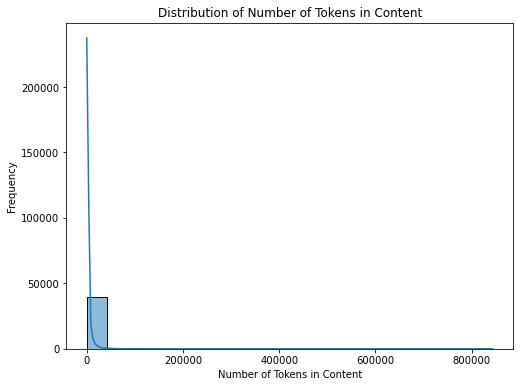

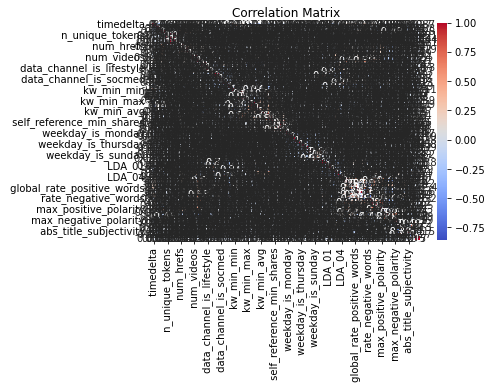

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
summary_stats = df.describe()

# Visualization (histogram for the 'n_tokens_content' column)
plt.figure(figsize=(8, 6))
sns.histplot(df[' shares'], bins=20, kde=True)
plt.xlabel('Number of Tokens in Content')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Tokens in Content')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

# 3) Feature Selection / Dimensionality Reduction:
This section serves as the crucible for data refinement in preparation for modeling. Initially, it identifies non-numeric columns and gently ushers them towards the exit. The result is a dataset brimming with numeric features, poised for analysis. The code contemplates the treatment of missing values, providing an example of their potential expulsion. Feature scaling, represented by StandardScaler, stands ready to magnify the model's performance. Predictor variables (X) and the target variable (y) are then defined. Recursive Feature Elimination (RFE) steps onto the stage, meticulously selecting the top 10 features. Simultaneously, Principal Component Analysis (PCA) is enlisted to orchestrate the reduction of data into 10 principal components. The selected features, the transformed data post PCA, and the divine explained variance ratio are unveiled to fathom the significance of each component.

Data Preprocessing: To prepare the data for modeling, we'll handle non-numeric columns, consider missing values, and explore feature scaling. We'll then define our predictor variables (X) and the target variable (y).

Data Preprocessing: To prepare the data for modeling, we'll handle non-numeric columns, consider missing values, and explore feature scaling. We'll then define our predictor variables (X) and the target variable (y).

Feature Selection and Dimensionality Reduction: In this phase, we'll employ Recursive Feature Elimination (RFE) to select the top 10 features. Additionally, Principal Component Analysis (PCA) will be used for dimensionality reduction. We'll showcase the selected features, the transformed data post PCA, and the explained variance ratio.

Selected Features: Index([' n_non_stop_words', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03',
       ' LDA_04', ' global_subjectivity', ' global_rate_positive_words',
       ' min_positive_polarity', ' avg_negative_polarity'],
      dtype='object')
Transformed Data (PCA):
[[ 7.91448520e+05  8.44168677e+04 -4.53641637e+03 ...  6.59736029e+02
   1.03991604e+03  9.45868134e+02]
 [ 7.91459110e+05  8.43893513e+04 -4.31851699e+03 ...  6.56091935e+02
   1.03921026e+03  9.61566198e+02]
 [ 7.91439509e+05  8.44402632e+04 -4.72179293e+03 ...  6.62892692e+02
   1.04040980e+03  9.42695511e+02]
 ...
 [-9.73690174e+04 -8.84993538e+03 -5.82125491e+03 ... -1.00645931e+03
  -8.30579553e+02 -4.17834019e+02]
 [-7.96794781e+04 -4.62221317e+04 -9.44285436e+01 ... -3.32251854e+01
   1.29202780e+03  4.46834046e+02]
 [-1.35373456e+05  1.11055911e+05  1.58423853e+05 ...  2.53146119e+02
  -8.14828912e+02  5.06894103e+01]]
Explained Variance Ratio: [7.62823883e-01 1.63830364e-01 3.53264345e-02 3.20505148e-02
 4.9268

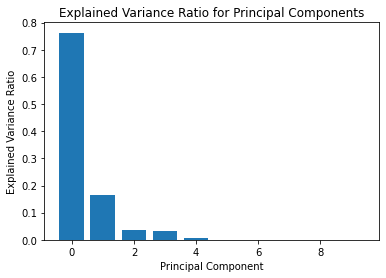

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# Identify and drop non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
df_numeric = df.drop(columns=non_numeric_columns)

# Handle missing values if needed
# df_numeric = df_numeric.dropna()  # Example for removing rows with missing values

# Feature scaling if needed
# scaler = StandardScaler()
# df_numeric_scaled = scaler.fit_transform(df_numeric)

# Define X and y
X = df_numeric.drop(columns=[' shares'])
y = df_numeric[' shares']

# Feature selection using RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

# Dimensionality reduction using PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Access selected features after RFE
selected_features_mask = rfe.support_

# Get the names of selected columns
selected_column_names = X.columns[selected_features_mask]
print("Selected Features:", selected_column_names)

# Access the transformed data after PCA
print("Transformed Data (PCA):")
print(X_pca)

# Access explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Optionally, you can visualize the explained variance ratio to decide on the number of components to retain.
import matplotlib.pyplot as plt
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio for Principal Components")
plt.show()

# 4) Regression Model Evaluation:
This section constitutes the heart of the code, focusing on the birth and assessment of a linear regression model. The dataset is surgically partitioned into training and testing sets, laying the foundation for the model's training. The linear regression model is summoned into existence, absorbing the knowledge emanating from the training data. Cross-validation, executed with finesse, bestows insights into the model's performance on the training data. The results are meticulously cataloged, and the model's accuracy is probed on the test set, as evidenced by the R-squared metric. The cross-validation scores, the mean CV score, and the test set R-squared value march forward, proclaiming the model's prowess.

Model Building and Evaluation: This is the core of our assignment. We will split the data into training and testing sets, initialize and train a linear regression model, perform cross-validation to assess its performance, and evaluate it on the test set using the R-squared metric.

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Report model performance
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Evaluate the model on the test set
test_score = model.score(X_test, y_test)
print("Test Set R-squared:", test_score)

Cross-Validation Scores: [ 0.00970637  0.02629357  0.04367544  0.01045521 -8.02270558]
Mean CV Score: -1.5865149969116747
Test Set R-squared: 0.026428511427936674


# 5) Conclusions:
This analysis journey has led us through a comprehensive exploration of a dataset and the development of a linear regression model. Let's recap the essential aspects:

Data Loading and Exploration: We initiated our journey by importing necessary libraries and fetching the dataset from a GitHub repository. Subsequently, we delved into the dataset's exploration, unearthing valuable insights. We examined column names, derived summary statistics, and visualized the distribution of 'shares.' Furthermore, a correlation matrix heatmap revealed relationships between various features.

Data Preprocessing: In preparation for modeling, we engaged in data preprocessing. Non-numeric columns were identified and removed, leaving us with a numeric-rich dataset. We contemplated handling missing values and explored feature scaling using the StandardScaler, though these steps are optional. We also defined our predictor variables (X) and the target variable (y).

Feature Selection and Dimensionality Reduction: A critical step involved feature selection and dimensionality reduction. Recursive Feature Elimination (RFE) highlighted the top 10 features, while Principal Component Analysis (PCA) transformed our data into 10 principal components. These procedures allowed us to grasp the significance of each component in our analysis.

Regression Model Evaluation: The core of our analysis revolved around the development and evaluation of a linear regression model. We split our dataset into training and testing sets and trained a linear regression model. Cross-validation was employed to gauge the model's performance on the training data, yielding cross-validation scores and a mean score. Finally, we assessed the model's accuracy on the test set, as indicated by the R-squared metric.

Concluding Remarks: This journey has provided a structured framework for data analysis and modeling. While the specific conclusions drawn from this analysis are contingent on the actual results, it serves as a robust foundation for further interpretation and insights based on the dataset at hand.

In essence, this process encompasses the key steps, from data exploration and preprocessing to model development and evaluation, aiming to uncover valuable patterns and relationships within the dataset.